## BERT: Bidirectional Encoder Representations from Transformers

> BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:
> - Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
> - Segment embeddings: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
> - Positional embeddings: A positional embedding is added to each token to indicate its position in the sentence.
 

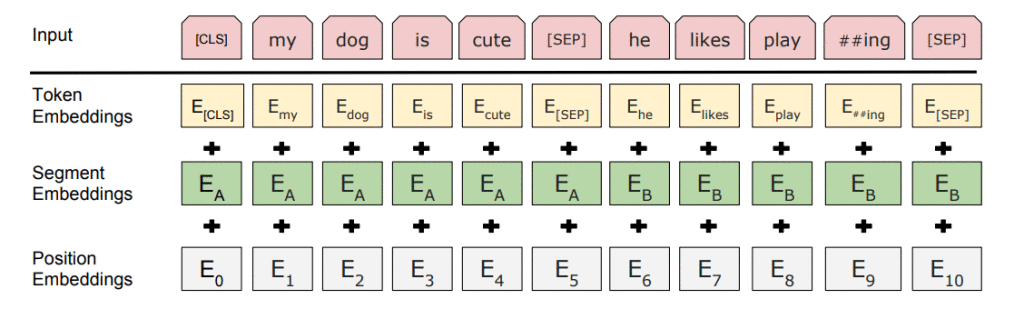

Above Text and Image is from(Credit/Source): https://www.analyticsvidhya.com/blog/2020/10/simple-text-multi-classification-task-using-keras-bert/

# BERT Keras Coding with HuggingFace Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from transformers import *  # this is HuggingFace library
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig

## More about BERT base model:
> Pretrained model on English language using a masked language modeling (MLM) objective. It was introduced in this paper and first released in this repository. This model is uncased: it does not make a difference between english and English.

Credit/Source: https://huggingface.co/bert-base-uncased

### Other types of BERT Trained Models:

1. BERT-Base, Uncased: 12-layer, 768-hidden, 12-heads, 110M parameters
2. BERT-Large, Uncased: 24-layer, 1024-hidden, 16-heads, 340M parameters
3. BERT-Base, Cased: 12-layer, 768-hidden, 12-heads , 110M parameters
4. BERT-Large, Cased: 24-layer, 1024-hidden, 16-heads, 340M parameters
5. BERT-Base, Multilingual Case: 104 languages, 12-layer, 768-hidden, 12-heads, 110M parameters
6. BERT-Base, Chinese: Chinese Simplified and Traditional, 12-layer, 768-hidden, 12-heads, 110M parameters

In [ ]:
# this will download the BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")  
# this will download the BERT Trained Model
# output_hidden_states=False, as we are training & not interested in output state.
config = BertConfig.from_pretrained("bert-base-uncased",output_hidden_states=False) # dropout=0.2, attention_dropout=0.2
bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

### Below is example how BERT Uncased Tokenizer works:


> * BERT-Base, uncased uses a vocabulary of 30,522 words. The processes of tokenization involve splitting the input text into a list of tokens that are available in the vocabulary. In order to deal with the words not available in the vocabulary, BERT uses a technique called BPE based WordPiece tokenization. In this approach, an out of vocabulary word is progressively split into subwords and the word is then represented by a group of subwords. Since the subwords are part of the vocabulary, we have learned representations a context for these subwords and the context of the word is simply the combination of the context of the subwords.
> 
> * The tokens are either words or subwords. Here for instance, “Kaggle” wasn’t in the model vocabulary, so it’s been split into “ka” and “##ggle”. To indicate those tokens are not separate words but parts of the same word, a double-hash prefix is added for “ggle”.

Credit/Source: https://swatimeena989.medium.com/bert-text-classification-using-keras-903671e0207d#b60a

You can see that Uppercase words are also converted into smallcase.

### tokenize:
Converts a string in a sequence of tokens, using the tokenizer

In [ ]:
sent= 'This is a example Text that we are using for Understanding Purpose, another word that we gonna use is Kaggle'
tokens=bert_tokenizer.tokenize(sent)
print(tokens)

---
### convert_tokens_to_ids:
Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
### encode:
Converts a string to a sequence of ids (integer), using the tokenizer and vocabulary.
###  encode_plus:
Returns a dictionary containing the encoded sequence or sequence pair and additional information: the mask for sequence classification and the overflowing elements if a max_length is specified.


## Difference b/ encode vs encode_plus:

> The main difference is stemming from the additional information that encode_plus is providing. If you read the documentation on the respective functions, then there is a slight difference forencode():
> 
> > Converts a string in a sequence of ids (integer), using the tokenizer and vocabulary. Same as doing self.convert_tokens_to_ids(self.tokenize(text)).
> 
> and the description of encode_plus():
> 
> > Returns a dictionary containing the encoded sequence or sequence pair and additional information: the mask for sequence classification and the overflowing elements if a max_length is specified.
> 
> Depending on your specified model and input sentence, the difference lies in the additionally encoded information, specifically the input mask. Since you are feeding in two sentences at a time, BERT (and likely other model variants), expect some form of masking, which allows the model to discern between the two sequences, see here(https://huggingface.co/transformers/model_doc/bert.html#transformers.BertTokenizer.create_token_type_ids_from_sequences). Since encode_plus is providing this information, but encode isn't, you get different output results.

Credit/Source: https://stackoverflow.com/a/61732210

In [ ]:
ids = bert_tokenizer.convert_tokens_to_ids(tokens)
print("convert_tokens_to_ids:",ids)

ids_encode = bert_tokenizer.encode(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode:",ids_encode)

ids_encode_plus = bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =30,pad_to_max_length = True,
return_attention_mask = True)
print("\n\nencode_plus:",ids_encode_plus)

## More about token_type_ids and attentation_mask:
### token_type_ids -
> This is enough for some models to understand where one sequence ends and where another begins.

sequence_a = "HuggingFace is based in NYC"

sequence_b = "Where is HuggingFace based?"

encoded_dict = tokenizer(sequence_a, sequence_b)

decoded = tokenizer.decode(encoded_dict["input_ids"])



> encoded_dict['token_type_ids']

>[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

> The first sequence, the “context” used for the question, has all its tokens represented by a 0, whereas the second sequence, corresponding to the “question”, has all its tokens represented by a 1.

### attention_mask –
> *  Mask to avoid performing attention on padding token indices. Mask values selected in [0, 1]: 1 for tokens that are not masked, 0 for tokens that are marked (0 if the token is added by padding).
> * This argument indicates to the model which tokens should be attended to, and which should not.
> * If we have 2 sentences and the sequence length of one sentence is 8 and another one is 10, then we need to make them of equal length and for that, padding is required. To distinguish between the padded and nonpadded input attention mask is used.

Credit/Source for attention_mask part: https://swatimeena989.medium.com/bert-text-classification-using-keras-903671e0207d#b60a




---
### convert_ids_to_tokens:
Converts a single index or a sequence of indices in a token or a sequence of tokens, using the vocabulary and added tokens.

### decode:
Converts a sequence of ids in a string, using the tokenizer and vocabulary with options to remove special tokens and clean up tokenization spaces

In [ ]:
print("convert_ids_to_tokens:",bert_tokenizer.convert_ids_to_tokens(ids))

print("\ndecode:",bert_tokenizer.decode(ids_encode_plus['input_ids']))

https://jaketae.github.io/category/common-sense/

## Lets start implementing BERT on some real life Dataset, here we are gonna use IMDB Movie Review dataset

In [ ]:
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
train = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv',encoding = "ISO-8859-1")

In [ ]:
train['sentiment'].value_counts()

In [ ]:
def clean_text(temp):
    temp=re.sub("@\S+", " ", temp)
    temp=re.sub("https*\S+", " ", temp)
    temp=re.sub("#\S+", " ", temp)
    temp=re.sub("\'\w+", '', temp)
    temp=re.sub(r'\w*\d+\w*', '', temp)
    temp=re.sub('\s{2,}', " ", temp)
    return temp.strip()

In [ ]:
train['review_clean'] = train['review'].apply(clean_text)
sentences = train['review_clean']

# train['OriginalTweetC'] = train['OriginalTweet'].apply(clean_text)
# sentences = train['OriginalTweetC']

In [ ]:
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =128,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
target = np.array(pd.get_dummies(train['sentiment']))

In [ ]:
bert_tokenizer.convert_ids_to_tokens(101)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,train_mask,test_mask=train_test_split(input_ids,target,attention_masks,test_size=0.2)

In [ ]:
bert_model.summary()

In [ ]:
def create_model(model_):
    input_ids = tf.keras.Input(shape=(128,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,),dtype='int32')
    
    output = model_(input_ids,attention_masks)
    output = output[0]      # this is inline in config.output_hidden_states as we want only the top head
    
    output = output[:,0,:]  #  We are only interested in <cls> or classification token of the model which can be extracted
                            #  using the slice operation. Now we have 2D data and build the network as one desired.
                            #  While converting 3D data to 2D we may miss on valuable info.
    
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(2,activation='softmax')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    
    
    for layer in model.layers[:3]:
        layer.trainable = False
    return model

model = create_model(bert_model)
model.summary()  

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit([X_train,train_mask],y_train,batch_size=32,epochs=4,validation_data=([X_test,test_mask],y_test))

In [ ]:
def create_model(model_):
    
    input_ids_in = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
    input_masks_in = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32') 

    embedding_layer = model_(input_ids_in, attention_mask=input_masks_in)[0] 
    # as 3D data is generated earlier embedding layer, we can use LSTM to extract great details
    X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(embedding_layer)
    # Next thing is to transform the 3D data into 2D so that we can use a FC layer. You can use any Pooling layer to perform this.
    X = tf.keras.layers.GlobalMaxPool1D()(X)
    X = tf.keras.layers.Dense(50, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    X = tf.keras.layers.Dense(2, activation='sigmoid')(X)
    model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

    for layer in model.layers[:3]:
        layer.trainable = False
        
    return model  

model = create_model(bert_model)
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit([X_train,train_mask],y_train,batch_size=32,epochs=4,validation_data=([X_test,test_mask],y_test))

Source/Credit for above two BERT codes:https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a

### More about sparse_categorical_crossentropy vs categorical_crossentropy:
> 
> * For sparse_categorical_crossentropy, For class 1 and class 2 targets, in a 5-class classification problem, the list should be [1,2]. Basically, the targets should be in integer form in order to call sparse_categorical_crossentropy. This is called sparse since the target representation requires much less space than one-hot encoding. For example, a batch with b targets and k classes needs b * k space to be represented in one-hot, whereas a batch with b targets and k classes needs b space to be represented in integer form.
> 
> * For categorical_crossentropy, for class 1 and class 2 targets, in a 5-class classification problem, the list should be [[0,1,0,0,0], [0,0,1,0,0]]. Basically, the targets should be in one-hot form in order to call categorical_crossentropy.

Source/Credit: https://stackoverflow.com/a/58574260